
### **Construction of KG**

In [ ]:
!pip install py2neo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177 kB 15.5 MB/s 


In [ ]:
from py2neo import Graph, Node, Relationship, NodeMatcher
import csv
import pandas as pd

Needed function : remove extra spaces and ending space if any

In [ ]:
import re
spaces = ['\u200b', '\u200e', '\u202a', '\u202c', '\ufeff', '\uf0d8', '\u2061', '\x10', '\x7f', '\x9d', '\xad', '\xa0']
def remove_space(text):
    for space in spaces:
        text = text.replace(space, ' ')
    text = text.strip()
    text = re.sub('\s+', ' ', text)
    return text

### Create Graph using py2neo

**Etablir la connexion avec l'instance DB neo4j créée**



In [ ]:
g = Graph("neo4j+s://6c577d7d.databases.neo4j.io", auth=("neo4j", "Y9BCgs0Wnp_rk0TbHuL0p6oSM3sAqpymXNXsV3VIHT4"))

A NodeMatcher can be used to locate nodes that fulfil a specific set of criteria.

In [ ]:
matcher = NodeMatcher(g)

Making sure that my graph isn't containing some nodes/relations from previous works.

In [ ]:
g.delete_all()

## **Graph 1** : ner & re on cybersecurity reports 

I'm gonna start by creating nodes

In [ ]:
import pandas as pd
df=pd.read_csv('df.csv') # csv file containing the extracted triplets from cybersecurity reports using best ner & re models

In [ ]:
df=pd.DataFrame({
    'source':df['source'].tolist(),
    'tag1':df['tag1'].tolist(),
    'relation_label':df['relation_label'].tolist(),
    'target':df['target'].tolist(),
    'tag2':df['tag2'].tolist()
})

In [ ]:
##malware
malware1=df[df['tag1']=='MALWARE']
malware1.to_csv('malware1.csv')
malware2=df[df['tag2']=='MALWARE']
malware2.to_csv('malware2.csv')

##attacker
attacker1=df[df['tag1']=='ATTACKER']
attacker1.to_csv('attacker1.csv')
attacker2=df[df['tag2']=='ATTACKER']
attacker2.to_csv('attacker2.csv')

##vulnerability
vuln1=df[df['tag1']=='VULNERABILITY']
vuln1.to_csv('vuln1.csv')
vuln2=df[df['tag2']=='VULNERABILITY']
vuln2.to_csv('vuln2.csv')

##product
prod1=df[df['tag1']=='PRODUCT']
prod1.to_csv('prod1.csv')
prod2=df[df['tag2']=='PRODUCT']
prod2.to_csv('prod2.csv')

##org
org1=df[df['tag1']=='ORG']
org1.to_csv('org1.csv')
org2=df[df['tag2']=='ORG']
org2.to_csv('org2.csv')

##LOC
loc1=df[df['tag1']=='LOC']
loc1.to_csv('loc1.csv')
loc2=df[df['tag2']=='LOC']
loc2.to_csv('loc2.csv')


##INFO
inf1=df[df['tag1']=='INFORMATION']
inf1.to_csv('inf1.csv')
inf2=df[df['tag2']=='INFORMATION']
inf2.to_csv('inf2.csv')

##DATE
date1=df[df['tag1']=='DATE']
date1.to_csv('date1.csv')
date2=df[df['tag2']=='DATE']
date2.to_csv('date2.csv')

##MALWARE CHARACTERISTICS
mc1=df[df['tag1']=='MALWARECHARACTERISTICS']
mc1.to_csv('mc1.csv')
mc2=df[df['tag2']=='MALWARECHARACTERISTICS']
mc2.to_csv('mc2.csv')


##INDICATOR
ind1=df[df['tag1']=='INDICATOR']
ind1.to_csv('ind1.csv')
ind2=df[df['tag2']=='INDICATOR']
ind2.to_csv('ind2.csv')

##ATTACKERGRP
ag1=df[df['tag1']=='ATTACKERGRP']
ag1.to_csv('ag1.csv')
ag2=df[df['tag2']=='ATTACKERGRP']
ag2.to_csv('ag2.csv')

##TARGET
target1=df[df['tag1']=='ExploitTargetObject']
target1.to_csv('target1.csv')
target2=df[df['tag2']=='ExploitTargetObject']
target2.to_csv('target2.csv')

##CAMPAIGN
camp1=df[df['tag1']=='CAMPAIGN']
camp1.to_csv('camp1.csv')
camp2=df[df['tag2']=='CAMPAIGN']
camp2.to_csv('camp2.csv')


### **node1: malware**

In [ ]:
name=[]
with open('malware1.csv', 'r') as f1:
    list_ = csv.reader(f1)
    for ele in list_:
      if list_.line_num == 1:
              continue
      if ele[1] not in name:
        attributs = {'Name': ele[1]}
        node_m1 = Node("Malware", **attributs)
        g.create(node_m1)
        name.append(ele[1])
with open('malware2.csv', 'r') as f1:
    list_ = csv.reader(f1)
    for ele in list_:
      if list_.line_num == 1:
                continue
      if ele[4] not in name:
        attributs = {'Name': ele[4]}
        node_m2 = Node("Malware", **attributs)
        g.create(node_m2)
        name.append(ele[4])

### **node2: attacker**

In [ ]:
name=[]
with open('attacker1.csv', 'r') as f1:
    list_ = csv.reader(f1)
    for ele in list_:
      if list_.line_num == 1:
                continue
      if ele[1] not in name:
        attributs = {'Name': ele[1]}
        node_a = Node("Attacker", **attributs)
        g.create(node_a)
        name.append(ele[1])
with open('attacker2.csv', 'r') as f1:
    list_ = csv.reader(f1)
    for ele in list_:
      if list_.line_num == 1:
                continue
      if ele[4] not in name:
        attributs = {'Name': ele[4]}
        node_a2 = Node("Attacker", **attributs)
        g.create(node_a2)
        name.append(ele[4])

### **node3: attacker group**

In [ ]:
name=[]
with open('ag1.csv', 'r') as f1:
    list_ = csv.reader(f1)
    for ele in list_:
      if list_.line_num == 1:
                continue
      if ele[1] not in name:
        attributs = {'Name': ele[1]}
        node_a = Node("AttackerGRP", **attributs)
        g.create(node_a)
        name.append(ele[1])
with open('ag2.csv', 'r') as f1:
    list_ = csv.reader(f1)
    for ele in list_:
      if list_.line_num == 1:
                continue
      if ele[4] not in name:
        attributs = {'Name': ele[4]}
        node_a2 = Node("AttackerGRP", **attributs)
        g.create(node_a2)
        name.append(ele[4])

### **node4: campaign**

In [ ]:
name=[]
with open('camp1.csv', 'r') as f1:
    list_ = csv.reader(f1)
    for ele in list_:
      if list_.line_num == 1:
                continue
      if ele[1] not in name:
        attributs = {'Name': ele[1]}
        node_a = Node("Campaign", **attributs)
        g.create(node_a)
        name.append(ele[1])
with open('camp2.csv', 'r') as f1:
    list_ = csv.reader(f1)
    for ele in list_:
      if list_.line_num == 1:
                continue
      if ele[4] not in name:
        attributs = {'Name': ele[4]}
        node_a2 = Node("Campaign", **attributs)
        g.create(node_a2)
        name.append(ele[4])

### **node5: date**

In [ ]:
name=[]
with open('date1.csv', 'r') as f1:
    list_ = csv.reader(f1)
    for ele in list_:
      if list_.line_num == 1:
                continue
      if ele[1] not in name:
        attributs = {'Name': ele[1]}
        node_a = Node("DATE", **attributs)
        g.create(node_a)
        name.append(ele[1])
with open('date2.csv', 'r') as f1:
    list_ = csv.reader(f1)
    for ele in list_:
      if list_.line_num == 1:
                continue
      if ele[4] not in name:
        attributs = {'Name': ele[4]}
        node_a2 = Node("DATE", **attributs)
        g.create(node_a2)
        name.append(ele[4])

### **node6: indicator**

In [ ]:
name=[]
with open('ind1.csv', 'r') as f1:
    list_ = csv.reader(f1)
    for ele in list_:
      if list_.line_num == 1:
                continue
      if ele[1] not in name:
        attributs = {'Name': ele[1]}
        node_a = Node("Indicator", **attributs)
        g.create(node_a)
        name.append(ele[1])
with open('ind2.csv', 'r') as f1:
    list_ = csv.reader(f1)
    for ele in list_:
      if list_.line_num == 1:
                continue
      if ele[4] not in name:
        attributs = {'Name': ele[4]}
        node_a2 = Node("Indicator", **attributs)
        g.create(node_a2)
        name.append(ele[4])

In [ ]:
df.to_csv('df.csv')

### **node7: information**

In [ ]:
name=[]
with open('inf1.csv', 'r') as f1:
    list_ = csv.reader(f1)
    for ele in list_:
      if list_.line_num == 1:
                continue
      if ele[1] not in name:
        attributs = {'Name': ele[1]}
        node_a = Node("Information", **attributs)
        g.create(node_a)
        name.append(ele[1])
with open('inf2.csv', 'r') as f1:
    list_ = csv.reader(f1)
    for ele in list_:
      if list_.line_num == 1:
                continue
      if ele[4] not in name:
        attributs = {'Name': ele[4]}
        node_a2 = Node("Information", **attributs)
        g.create(node_a2)
        name.append(ele[4])

### **node8: location**

In [ ]:
name=[]
with open('loc1.csv', 'r') as f1:
    list_ = csv.reader(f1)
    for ele in list_:
      if list_.line_num == 1:
                continue
      if ele[1] not in name:
        attributs = {'Name': ele[1]}
        node_a = Node("Location", **attributs)
        g.create(node_a)
        name.append(ele[1])
with open('loc2.csv', 'r') as f1:
    list_ = csv.reader(f1)
    for ele in list_:
      if list_.line_num == 1:
                continue
      if ele[4] not in name:
        attributs = {'Name': ele[4]}
        node_a2 = Node("Location", **attributs)
        g.create(node_a2)
        name.append(ele[4])

### **node9: malware features**

In [ ]:
name=[]
with open('mc1.csv', 'r') as f1:
    list_ = csv.reader(f1)
    for ele in list_:
      if list_.line_num == 1:
                continue
      if ele[1] not in name:
        attributs = {'Name': ele[1]}
        node_a = Node("Features", **attributs)
        g.create(node_a)
        name.append(ele[1])
with open('mc2.csv', 'r') as f1:
    list_ = csv.reader(f1)
    for ele in list_:
      if list_.line_num == 1:
                continue
      if ele[4] not in name:
        attributs = {'Name': ele[4]}
        node_a2 = Node("Features", **attributs)
        g.create(node_a2)
        name.append(ele[4])

### **node10: organisation**

In [ ]:
name=[]
with open('org1.csv', 'r') as f1:
    list_ = csv.reader(f1)
    for ele in list_:
      if list_.line_num == 1:
                continue
      if ele[1] not in name:
        attributs = {'Name': ele[1]}
        node_a = Node("Organisation", **attributs)
        g.create(node_a)
        name.append(ele[1])
with open('org2.csv', 'r') as f1:
    list_ = csv.reader(f1)
    for ele in list_:
      if list_.line_num == 1:
                continue
      if ele[4] not in name:
        attributs = {'Name': ele[4]}
        node_a2 = Node("Organisation", **attributs)
        g.create(node_a2)
        name.append(ele[4])

### **node11: product**

In [ ]:
name=[]
with open('prod1.csv', 'r') as f1:
    list_ = csv.reader(f1)
    for ele in list_:
      if list_.line_num == 1:
                continue
      if ele[1] not in name:
        attributs = {'Name': ele[1]}
        node_a = Node("Product", **attributs)
        g.create(node_a)
        name.append(ele[1])
with open('prod2.csv', 'r') as f1:
    list_ = csv.reader(f1)
    for ele in list_:
      if list_.line_num == 1:
                continue
      if ele[4] not in name:
        attributs = {'Name': ele[4]}
        node_a2 = Node("Product", **attributs)
        g.create(node_a2)
        name.append(ele[4])

### **node12: exploit target object**

In [ ]:
name=[]
with open('target1.csv', 'r') as f1:
    list_ = csv.reader(f1)
    for ele in list_:
      if list_.line_num == 1:
                continue
      if ele[1] not in name:
        attributs = {'Name': ele[1]}
        node_a = Node("ExploitTargetObject", **attributs)
        g.create(node_a)
        name.append(ele[1])
with open('target2.csv', 'r') as f1:
    list_ = csv.reader(f1)
    for ele in list_:
      if list_.line_num == 1:
                continue
      if ele[4] not in name:
        attributs = {'Name': ele[4]}
        node_a2 = Node("ExploitTargetObject", **attributs)
        g.create(node_a2)
        name.append(ele[4])

### **node13: vulnerability**

In [ ]:
with open('vuln1.csv', 'r') as f1:
    list_ = csv.reader(f1)
    for ele in list_:
        if list_.line_num == 1:
                continue
        attributs = {'Name': ele[1]}
        node_a = Node("Vulnerability", **attributs)
        g.create(node_a)
        name.append(ele[1])
with open('vuln2.csv', 'r') as f1:
    list_ = csv.reader(f1)
    for ele in list_:
        if list_.line_num == 1:
                continue
        attributs = {'Name': ele[4]}
        node_a2 = Node("Vulnerability", **attributs)
        g.create(node_a2)
        name.append(ele[4])

## **Creating Edges**

After creating successfully nodes, m gonna create edges to link between them

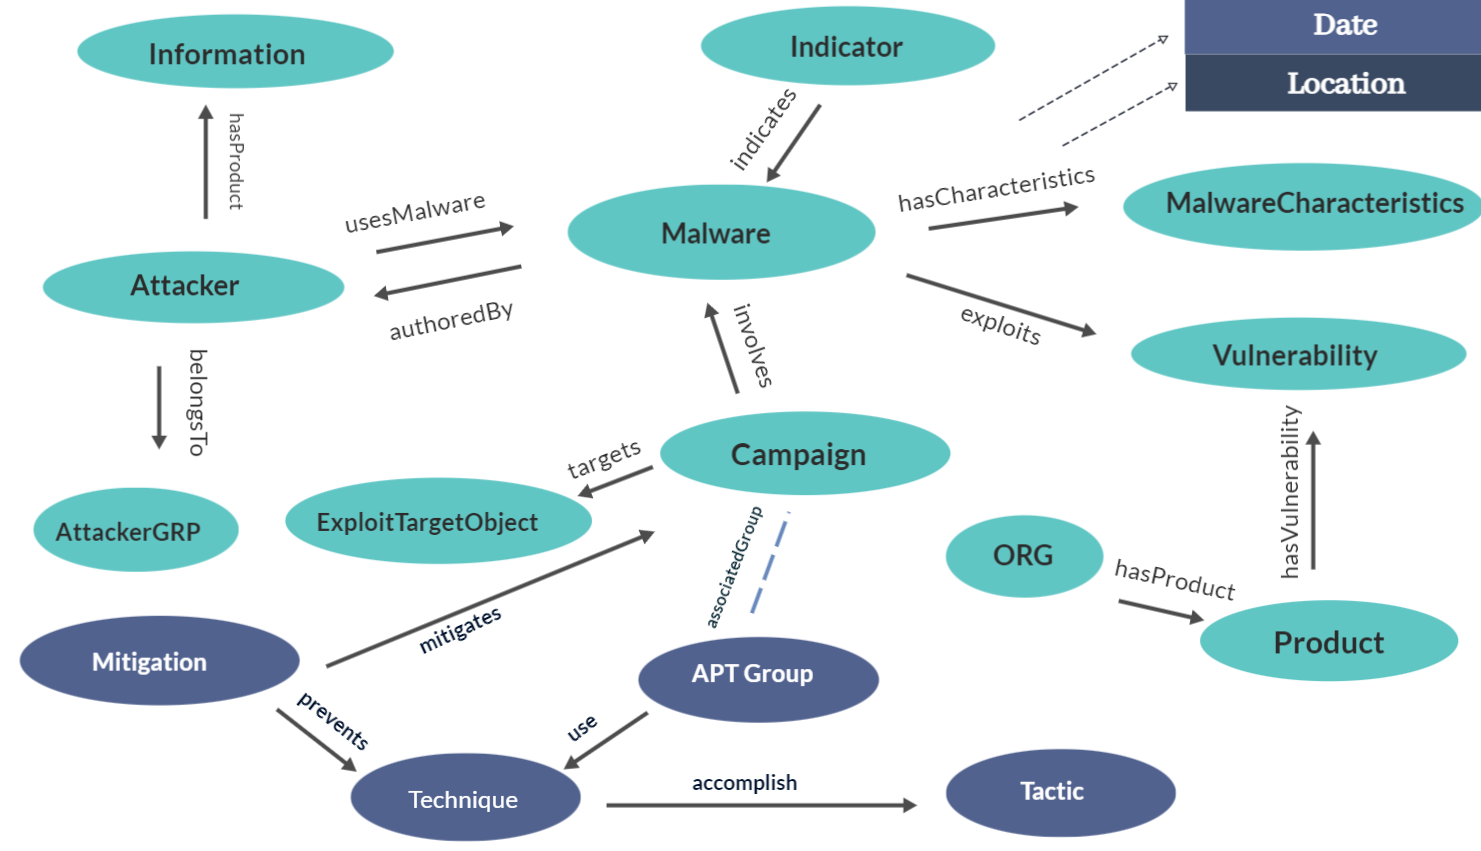

In [ ]:
nodes_graph={
    'MALWARE':'Malware',
    'ATTACKER':'Attacker',
    'ATTACKERGRP':'AttackerGRP',
    'VULNERABILITY':'Vulnerability',
    'INFORMATION':'Information',
    'PRODUCT':'Product',
    'ORG':'Organization',
    'LOC':'Location',
    'DATE':'DATE',
    'CAMPAIGN':'Campaign',
    'MALWARECHARACTERISTICS':'Features',
    'ExploitTargetObject':'ExploitTargetObject',
    'INDICATOR':'Indicator'
}

In [ ]:
with open('ag2.csv', 'r') as f3:
       list_ = csv.reader(f3)
       for row in list_:
            if list_.line_num == 1:
                continue
            attrs={'Name': row[4]}
            curr_node=Node("AttackerGRP", **attrs)
            node=nodes_graph[row[2]]
            rel=row[3]
            g.merge(curr_node, "AttackerGRP", "Name") 
            Tempnode = matcher.match(node).where("_.Name=~'" + row[1] + "'").first()
            if Tempnode != None:
                  relation3 = Relationship(Tempnode, rel, curr_node)
                  g.create(relation3)

In [ ]:
with open('attacker1.csv', 'r') as f3:
       list_ = csv.reader(f3)
       for row in list_:
            if list_.line_num == 1:
                continue
            attrs={'Name': row[1]}
            curr_node=Node("Attacker", **attrs)
            node=nodes_graph[row[5]]
            rel=row[3]
            g.merge(curr_node, "Attacker", "Name") 
            #Tempnode= matcher.match(node, name=row[4]).first()
            Tempnode= matcher.match(node).where('_.Name=~ "'+ row[4] +'"' ).first()
            if Tempnode != None:
                  relation3 = Relationship(curr_node, rel, Tempnode)
                  g.create(relation3)

In [ ]:
with open('attacker2.csv', 'r') as f3:
       list_ = csv.reader(f3)
       for row in list_:
            if list_.line_num == 1:
                continue
            attrs={'Name': row[4]}
            curr_node=Node("Attacker", **attrs)
            node=nodes_graph[row[2]]
            rel=row[3]
            g.merge(curr_node, "Attacker", "Name") 
            Tempnode = matcher.match(node).where("_.Name=~ '" + row[1] + "'").first()
            if Tempnode != None:
                  relation3 = Relationship(Tempnode, rel, curr_node)
                  g.create(relation3)

In [ ]:
with open('camp2.csv', 'r') as f3:
       list_ = csv.reader(f3)
       for row in list_:
          if list_.line_num == 1:
                continue
          attrs={'Name': row[4]}
          curr_node=Node("Campaign", **attrs)
          node=nodes_graph[row[2]]
          rel=row[3]
          g.merge(curr_node, "Campaign", "Name") 
          Tempnode = matcher.match(node).where("_.Name=~'" + row[1] + "'").first()
          if Tempnode != None:
                  relation3 = Relationship(Tempnode, rel, curr_node)
                  g.create(relation3)

In [ ]:
with open('date2.csv', 'r') as f3:
       list_ = csv.reader(f3)
       for row in list_:
          if list_.line_num == 1:
                continue
          attrs={'Name': row[4]}
          curr_node=Node("DATE", **attrs)
          node=nodes_graph[row[2]]
          rel=row[3]
          g.merge(curr_node, "DATE", "Name") 
          Tempnode = matcher.match(node).where("_.Name=~'" + row[1] + "'").first()
          if Tempnode != None:
                  relation3 = Relationship(Tempnode, rel, curr_node)
                  g.create(relation3)

In [ ]:
with open('inf2.csv', 'r') as f3:
       list_ = csv.reader(f3)
       for row in list_:
            if list_.line_num == 1:
                continue
            attrs={'Name': row[4]}
            curr_node=Node("Information", **attrs)
            node=nodes_graph[row[2]]
            rel=row[3]
            g.merge(curr_node, "Information", "Name") 
            Tempnode = matcher.match(node).where("_.Name=~'" + row[1] + "'").first()
            if Tempnode != None:
                  relation3 = Relationship(Tempnode, rel, curr_node)
                  g.create(relation3)

In [ ]:
with open('loc2.csv', 'r') as f3:
       list_ = csv.reader(f3)
       for row in list_:
          if list_.line_num == 1:
                continue
          attrs={'Name': row[4]}
          curr_node=Node("Location", **attrs)
          node=nodes_graph[row[2]]
          rel=row[3]
          g.merge(curr_node, "Location", "Name") 
          Tempnode = matcher.match(node).where("_.Name=~'" + row[1] + "'").first()
          if Tempnode != None:
                  relation3 = Relationship(Tempnode, rel, curr_node)
                  g.create(relation3)

In [ ]:
with open('malware2.csv', 'r') as f3:
       list_ = csv.reader(f3)
       for row in list_:
            if list_.line_num == 1:
                continue
            attrs={'Name': row[4]}
            curr_node=Node("Malware", **attrs)
            node=nodes_graph[row[2]]
            rel=row[3]
            g.merge(curr_node, "Malware", "Name")
            if row[1] != "windows \\ system32 \\ wbem \\": 
              Tempnode = matcher.match(node).where("_.Name=~'" + row[1] + "'").first()
              if Tempnode != None:
                  relation3 = Relationship(Tempnode, rel, curr_node)
                  g.create(relation3)

In [ ]:
with open('mc2.csv', 'r') as f3:
       list_ = csv.reader(f3)
       for row in list_:
            if list_.line_num == 1:
                continue
            attrs={'Name': row[4]}
            curr_node=Node("Features", **attrs)
            node=nodes_graph[row[2]]
            rel=row[3]
            g.merge(curr_node, "Features", "Name") 
            Tempnode = matcher.match(node).where("_.Name=~'" + row[1] + "'").first()
            if Tempnode != None:
                  relation3 = Relationship(Tempnode, rel, curr_node)
                  g.create(relation3)

In [ ]:
with open('org2.csv', 'r') as f3:
       list_ = csv.reader(f3)
       for row in list_:
            if list_.line_num == 1:
                continue
            attrs={'Name': row[4]}
            curr_node=Node("Organisation", **attrs)
            node=nodes_graph[row[2]]
            rel=row[3]
            g.merge(curr_node, "Organisation", "Name") 
            Tempnode = matcher.match(node).where("_.Name=~'" + row[1] + "'").first()
            if Tempnode != None:
                  relation3 = Relationship(Tempnode, rel, curr_node)
                  g.create(relation3)

In [ ]:
with open('prod2.csv', 'r') as f3:
       list_ = csv.reader(f3)
       for row in list_:
            if list_.line_num == 1:
                continue
            attrs={'Name': row[4]}
            curr_node=Node("Product", **attrs)
            node=nodes_graph[row[2]]
            rel=row[3]
            g.merge(curr_node, "Product", "Name") 
            Tempnode = matcher.match(node).where("_.Name=~'" + row[1] + "'").first()
            if Tempnode != None:
                  relation3 = Relationship(Tempnode, rel, curr_node)
                  g.create(relation3)

In [ ]:
with open('target2.csv', 'r') as f3:
       list_ = csv.reader(f3)
       for row in list_:
            if list_.line_num == 1:
                continue
            attrs={'Name': row[4]}
            curr_node=Node("ExploitTargetObject", **attrs)
            node=nodes_graph[row[2]]
            rel=row[3]
            g.merge(curr_node, "ExploitTargetObject", "Name") 
            Tempnode = matcher.match(node).where("_.Name=~'" + row[1] + "'").first()
            if Tempnode != None:
                  relation3 = Relationship(Tempnode, rel, curr_node)
                  g.create(relation3)

In [ ]:
with open('vuln2.csv', 'r') as f3:
       list_ = csv.reader(f3)
       for row in list_:
            if list_.line_num == 1:
                continue
            attrs={'Name': row[4]}
            curr_node=Node("Vulnerability", **attrs)
            node=nodes_graph[row[2]]
            rel=row[3]
            g.merge(curr_node, "Vulnerability", "Name").first() 
            Tempnode = matcher.match(node).where("_.Name=~'" + row[1] + "'").first()
            if Tempnode != None:
                  relation3 = Relationship(Tempnode, rel, curr_node)
                  g.create(relation3)

In [ ]:
with open('camp1.csv', 'r') as f3:
       list_ = csv.reader(f3)
       for row in list_:
            if list_.line_num == 1:
                continue
            attrs={'Name': row[1]}
            curr_node=Node("Campaign", **attrs)
            node=nodes_graph[row[5]]
            rel=row[3]
            g.merge(curr_node, "Campaign", "Name") 
            #Tempnode= matcher.match(node, name=row[4]).first()
            Tempnode= matcher.match(node).where('_.Name=~ "'+ row[4] +'"' ).first()
            if Tempnode != None:
                  relation3 = Relationship(curr_node, rel, Tempnode)
                  g.create(relation3)

In [ ]:
with open('date1.csv', 'r') as f3:
       list_ = csv.reader(f3)
       for row in list_:
            if list_.line_num == 1:
                continue
            attrs={'Name': row[1]}
            curr_node=Node("DATE", **attrs)
            node=nodes_graph[row[5]]
            rel=row[3]
            g.merge(curr_node, "DATE", "Name") 
            #Tempnode= matcher.match(node, name=row[4]).first()
            Tempnode= matcher.match(node).where('_.Name=~ "'+ row[4] +'"' ).first()
            if Tempnode != None:
                  relation3 = Relationship(curr_node, rel, Tempnode)
                  g.create(relation3)

In [ ]:
with open('ind1.csv', 'r') as f3:
       list_ = csv.reader(f3)
       for row in list_:
            if list_.line_num == 1:
                continue
            attrs={'Name': row[1]}
            curr_node=Node("Indicator", **attrs)
            node=nodes_graph[row[5]]
            rel=row[3]
            g.merge(curr_node, "Indicator", "Name") 
            #Tempnode= matcher.match(node, name=row[4]).first()
            Tempnode= matcher.match(node).where('_.Name=~ "'+ row[4] +'"' ).first()
            if Tempnode != None:
                  relation3 = Relationship(curr_node, rel, Tempnode)
                  g.create(relation3)

In [ ]:
with open('inf1.csv', 'r') as f3:
       list_ = csv.reader(f3)
       for row in list_:
            if list_.line_num == 1:
                continue
            attrs={'Name': row[1]}
            curr_node=Node("Information", **attrs)
            node=nodes_graph[row[5]]
            rel=row[3]
            g.merge(curr_node, "Information", "Name") 
            #Tempnode= matcher.match(node, name=row[4]).first()
            Tempnode= matcher.match(node).where('_.Name=~ "'+ row[4] +'"' ).first()
            if Tempnode != None:
                  relation3 = Relationship(curr_node, rel, Tempnode)
                  g.create(relation3)

In [ ]:
with open('loc1.csv', 'r') as f3:
       list_ = csv.reader(f3)
       for row in list_:
            if list_.line_num == 1:
                continue
            attrs={'Name': row[1]}
            curr_node=Node("Location", **attrs)
            node=nodes_graph[row[5]]
            rel=row[3]
            g.merge(curr_node, "Location", "Name") 
            #Tempnode= matcher.match(node, name=row[4]).first()
            Tempnode= matcher.match(node).where('_.Name=~ "'+ row[4] +'"' ).first()
            if Tempnode != None:
                  relation3 = Relationship(curr_node, rel, Tempnode)
                  g.create(relation3)

In [ ]:
with open('malware1.csv', 'r') as f3:
       list_ = csv.reader(f3)
       for row in list_:
            if list_.line_num == 1:
                continue
            attrs={'Name': row[1]}
            curr_node=Node("Malware", **attrs)
            node=nodes_graph[row[5]]
            rel=row[3]
            g.merge(curr_node, "Malware", "Name") 
            #Tempnode= matcher.match(node, name=row[4]).first()
            Tempnode= matcher.match(node).where('_.Name=~ "'+ row[4] +'"' ).first()
            if Tempnode != None:
                  relation3 = Relationship(curr_node, rel, Tempnode)
                  g.create(relation3)

In [ ]:
with open('mc1.csv', 'r') as f3:
       list_ = csv.reader(f3)
       for row in list_:
            if list_.line_num == 1:
                continue
            attrs={'Name': row[1]}
            curr_node=Node("Features", **attrs)
            node=nodes_graph[row[5]]
            rel=row[3]
            g.merge(curr_node, "Features", "Name") 
            #Tempnode= matcher.match(node, name=row[4]).first()
            Tempnode= matcher.match(node).where('_.Name=~ "'+ row[4] +'"' ).first()
            if Tempnode != None:
                  relation3 = Relationship(curr_node, rel, Tempnode)
                  g.create(relation3)

In [ ]:
with open('org1.csv', 'r') as f3:
       list_ = csv.reader(f3)
       for row in list_:
            if list_.line_num == 1:
                continue
            attrs={'Name': row[1]}
            curr_node=Node("Organisation", **attrs)
            node=nodes_graph[row[5]]
            rel=row[3]
            g.merge(curr_node, "Organisation", "Name") 
            #Tempnode= matcher.match(node, name=row[4]).first()
            Tempnode= matcher.match(node).where('_.Name=~ "'+ row[4] +'"' ).first()
            if Tempnode != None:
                  relation3 = Relationship(curr_node, rel, Tempnode)
                  g.create(relation3)

In [ ]:
with open('prod1.csv', 'r') as f3:
       list_ = csv.reader(f3)
       for row in list_:
            if list_.line_num == 1:
                continue
            attrs={'Name': row[1]}
            curr_node=Node("Product", **attrs)
            node=nodes_graph[row[5]]
            rel=row[3]
            g.merge(curr_node, "Product", "Name") 
            #Tempnode= matcher.match(node, name=row[4]).first()
            Tempnode= matcher.match(node).where('_.Name=~ "'+ row[4] +'"' ).first()
            if Tempnode != None:
                  relation3 = Relationship(curr_node, rel, Tempnode)
                  g.create(relation3)

In [ ]:
with open('target1.csv', 'r') as f3:
       list_ = csv.reader(f3)
       for row in list_:
            if list_.line_num == 1:
                continue
            attrs={'Name': row[1]}
            curr_node=Node("ExploitTargetObject", **attrs)
            node=nodes_graph[row[5]]
            rel=row[3]
            g.merge(curr_node, "ExploitTargetObject", "Name") 
            #Tempnode= matcher.match(node, name=row[4]).first()
            Tempnode= matcher.match(node).where('_.Name=~ "'+ row[4] +'"' ).first()
            if Tempnode != None:
                  relation3 = Relationship(curr_node, rel, Tempnode)
                  g.create(relation3)

In [ ]:
with open('vuln1.csv', 'r') as f3:
       list_ = csv.reader(f3)
       for row in list_:
            if list_.line_num == 1:
                continue
            attrs={'Name': row[1]}
            curr_node=Node("Vulnerability", **attrs)
            node=nodes_graph[row[5]]
            rel=row[3]
            g.merge(curr_node, "Vulnerability", "Name") 
            #Tempnode= matcher.match(node, name=row[4]).first()
            Tempnode= matcher.match(node).where('_.Name=~ "'+ row[4] +'"' ).first()
            if Tempnode != None:
                  relation3 = Relationship(curr_node, rel, Tempnode)
                  g.create(relation3)

## **Graph 2 : Attacker behavior**

After creating KG1 based on text files generated from cybersecurity reports, m gonna add extra knowledge to the graph which mainly consists on the behavior of the attacker.

**a- Creation des noeuds / relations pour l'entité Tactics**

step 1: Reading the csv file 

Step 2 : Creating tactics node with its associated attributs ( extracted from the csv file )

Step 3 : Adding the relation between tactics nodes ( Step )

The first line of a CSV file is the header and contains the names of the fields/features.

After the header, each line of the file is an observation/a record. The values of a record are separated by “comma.”

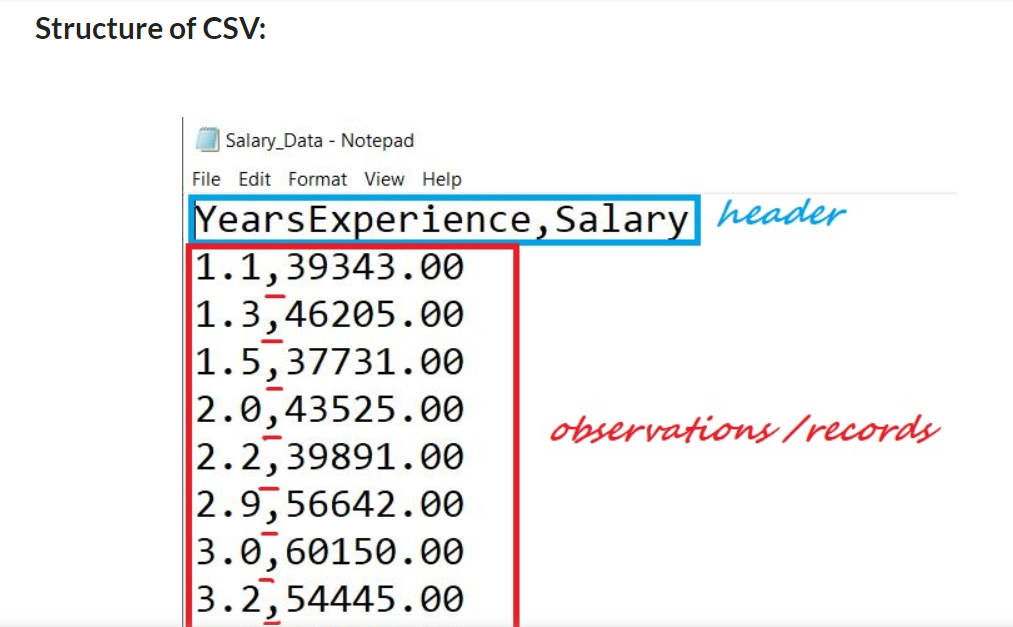

In [ ]:
i = 0
with open('/drive/My Drive/ATT&CK MATRICES Tac.csv', 'r') as f1:
    Tactics_info_list = csv.reader(f1)
    for tac in Tactics_info_list:
        if Tactics_info_list.line_num == 1:
                continue
        Tactics_attrs = {'Name': tac[0].replace(' ', ''), 'Intro': tac[1], 'ID': tac[2], 'Created': tac[3],
                             'Last_Modified': tac[4]}
        Tactics_node = Node("Tactics", **Tactics_attrs)
        g.create(Tactics_node)

        ##Adding relations
        i = i + 1
        if 1 < i < 13:
            pre_node = cur_node
            cur_node = Tactics_node
            relation1 = Relationship(pre_node, 'Step', cur_node)
            g.create(relation1)
        else:
            cur_node = Tactics_node
            
print('Nodes and relations are created successfully !')

Nodes and relations are created successfully !


**c- Creation des noeuds / relations pour l'entité Technique**

same steps as above

Info : In Py2neo **graph.merge** matches or creates a single node by label, where you are wanting to MERGE on the entire pattern (node, relationship, other node)

In [ ]:
with open('/drive/My Drive/ATT&CK MATRICES Tec.csv', 'r') as f2:
        Techniques_info_list = csv.reader(f2)
        for tec in Techniques_info_list:
            if Techniques_info_list.line_num == 1:
                continue
            Techniques_attrs = {'Name': tec[0], 'ID': tec[1], 'Sub-Tec': tec[2], 'Tactic': tec[3],
                                'Platforms': tec[4], 'Data Sources': tec[5], 'Permissions Required': tec[6]}
            Techniques_node = Node("Techniques", **Techniques_attrs)
            g.merge(Techniques_node, "Techniques", "Name") 

            # Tactic/Techniques relationship
            if ',' not in tec[3]:
                Tempnode = matcher.match('Tactics').where("_.Name=~'(?i)" + tec[3] + "'").first()
                if Tempnode != None:
                    relation2 = Relationship(Techniques_node, 'Accomplishes', Tempnode)
                    g.create(relation2)
            else:
                Temp_tac_list = tec[3].split(',')
                for i in range(0, len(Temp_tac_list)):
                    Tempnode = matcher.match('Tactics').where("_.Name=~'(?i)" + Temp_tac_list[i] + "'").first()
                    if Tempnode != None:
                        relation2 = Relationship(Techniques_node, 'Accomplishes', Tempnode)
                        g.create(relation2)

**d- Creation des noeuds / relations pour l'entité Mitigations**

In [ ]:
with open('/drive/My Drive/ATT&CK MATRICES Miti.csv', 'r') as f3:
        Mitigations_info_list = csv.reader(f3)
        for miti in Mitigations_info_list:
            if Mitigations_info_list.line_num == 1:
                continue
            # miti[3]
            if miti[3] == '[]':
                miti[3] = ['None']
            else:
                miti[3] = miti[3].replace("'", "").replace("[", "").replace("]", "").split(", ")
                # print(miti[3])
            Mitigations_attrs = {'Name': miti[0], 'ID': miti[1], 'Description': miti[2],
                                 'Tecs Addressed by Mitigation': miti[3]}
            Mitigations_node = Node("Mitigations", **Mitigations_attrs)
            g.create(Mitigations_node)

            #Mitigations / Techniques
            for addressed_tec in miti[3]:
                Tempnode = matcher.match('Techniques').where("_.Name=~'" + addressed_tec + "'").first()
                if Tempnode != None:
                    relation3 = Relationship(Mitigations_node, 'Prevents', Tempnode)
                    g.create(relation3)

**d- Creation des noeuds / relations pour l'entité Group**

In [ ]:
with open('/drive/My Drive/ATT&CK MATRICES Group.csv', 'r') as f4:
        Groups_info_list = csv.reader(f4)
        for group in Groups_info_list:
            if Groups_info_list.line_num == 1:
                continue
            if group[3] == '':
                group[3] = ['None']
            if group[2] == '[]':
                group[2] = ['None']
            else:
                group[2] = group[2].replace("'", "").replace("[", "").replace("]", "").split(", ")
            Groups_attrs = {'Name': group[0], 'ID': group[1], 'Associated groups': group[3],
                                 'Tecs Used by Group': group[2]}
            Groups_node = Node("Groups", **Groups_attrs)
            g.merge(Groups_node, "Groups", "Name") 
            # Groups/Techniques
            for Used_tec in group[2]:
                Tempnode = matcher.match('Techniques').where("_.ID=~'" + Used_tec + "'").first()
                if Tempnode != None:
                    relation4 = Relationship(Groups_node, 'Uses', Tempnode)
                    g.create(relation4)
            g.merge(Groups_node, "Groups", "Name") 
            #Groups/campaign
            if group[3] != ['None']:
             for c in group[3].split(','):
                c=remove_space(c)
                Tempnode = matcher.match('Campaign').where("_.Name=~'" + c + "'").first()
                if Tempnode != None:
                    relation4 = Relationship(Tempnode, 'associatedTo', Groups_node)
                    g.create(relation4)